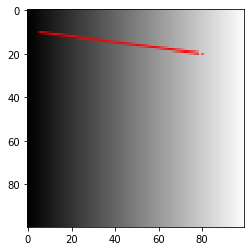

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def _fpart(x):
    return x - int(x)

def _rfpart(x):
    return 1 - _fpart(x)

def _round(x): 
    return int(np.floor(x+0.5)) 


def putpixel(data, x, y, color, alpha=1.0): 
#     print(data,x, y,color) 
    x = int(x) 
    y = int(y) 
    bg = data [y][x] 
    if(alpha>1.0): 
        alpha=1. 
    color2 = [0.0, 0.0 ,0.0 ] 
    color2[0] = alpha * color[0] + (1.0 - alpha) *bg[0] 
    color2[1] = alpha * color[1] + (1.0 - alpha) *bg[1] 
    color2[2] = alpha * color[2] + (1.0 - alpha) *bg[2] 
    data[y, x] = color2
    
def drawXWline(x1, y1, x2, y2, color):
# def lineXWcolor(data, x1, y1, x2, y2, color):
    
    data = np.zeros((100,100,3),dtype =np.uint8)
    for i in range(100):
        data[:, i] = i*255/100
    dx = x2 - x1
    dy = y2 - y1
    steep = abs(dx) < abs(dy)
    
    if steep:
        x1, y1, x2, y2, dx, dy = y1, x1, y2, x2, dy, dx
    if x2 < x1:
        x1, x2, y1, y2 = x2, x1, y2, y1

    gradient = dy/dx
    
    xend = round(x1)
    yend = y1 + gradient * (xend - x1)
    
    xgap = _rfpart(x1+0.5)
    xpxl1 = xend
    ypxl1 = math.floor(yend)
    
    if steep:
        putpixel(data,ypxl1, xpxl1, color, _rfpart(yend) * xgap)
        putpixel(data,ypxl1+1,xpxl1,color, _fpart(yend)*xgap)
    else:
        putpixel(data,xpxl1, ypxl1, color, _rfpart(yend) *xgap) 
        putpixel(data,xpxl1,ypxl1+1,color, _fpart(yend)*xgap)
    
    intery = yend + gradient
    xend = round(x2)
    yend = y2 + gradient * (xend - x2)
    xgap = _rfpart(x2+0.5)
    xpxl2 = xend
    ypxl2 = math.floor(yend)
    
    if steep:
        putpixel(data,ypxl2, xpxl2, color, _rfpart(yend) * xgap)
        putpixel(data,ypxl2+1, xpxl2, color, _fpart(yend) * xgap)
    else:
        putpixel(data,xpxl2, ypxl2, color, _rfpart(yend) * xgap)
        putpixel(data,xpxl2, ypxl2+1, color, _fpart(yend) * xgap)
        
    if steep:
        for x in range( xpxl1 + 1, xpxl2 -1): 
            putpixel(data,math.floor(intery), x, color, _rfpart(intery))
            putpixel(data,math.floor(intery) + 1, x, color, _fpart(intery))
            intery = intery + gradient
    else:
        for x in range( xpxl1 + 1, xpxl2 -1): 
            putpixel(data,x, math.floor(intery), color, _rfpart(intery))
            putpixel(data,x, math.floor(intery) + 1, color, _fpart(intery))
            intery = intery + gradient
    plt.imshow(data,interpolation='none')
    
data = np.zeros((100,100,3),dtype =np.uint8)
# plt.imshow(data,interpolation='none')

# print(data)
# lineXWcolor(data,1,10,15,20,[139,0,0])
drawXWline(5,10,80,20,[255,0,0])



